In [33]:
import pandas as pd

In [34]:
injections_per_fm = 250

In [35]:
df = pd.read_csv("./results_stdout.csv")
df.columns = ["Group", "Type", *df.columns[2:]]
df

,Group,Type,Output error,Classification error,Other error
0,gp,FLIP_SINGLE_BIT,11.2,0.0,6.4
1,gp,RANDOM_VALUE,38.8,8.4,10.4
2,ld,FLIP_SINGLE_BIT,4.0,0.8,0.0
3,ld,RANDOM_VALUE,34.0,6.0,0.0
4,fp32,FLIP_SINGLE_BIT,10.4,1.2,0.0
5,fp32,RANDOM_VALUE,38.8,10.0,0.0
6,fp32,WARP_RANDOM_VALUE,80.8,7.6,0.0


<Axes: title={'center': 'LDs error measurements'}, xlabel='Type', ylabel='error rate %'>

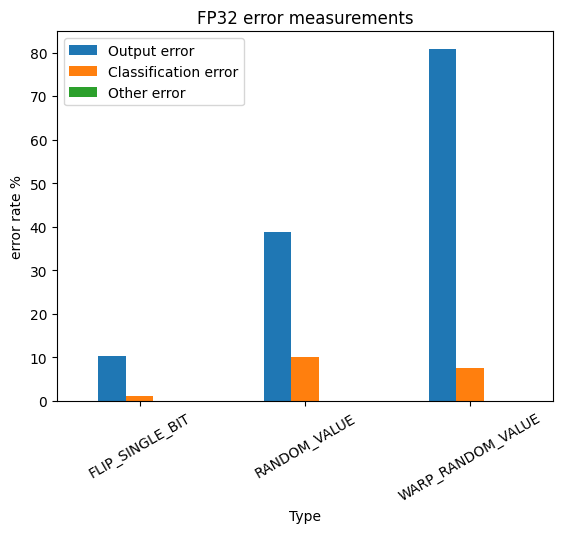

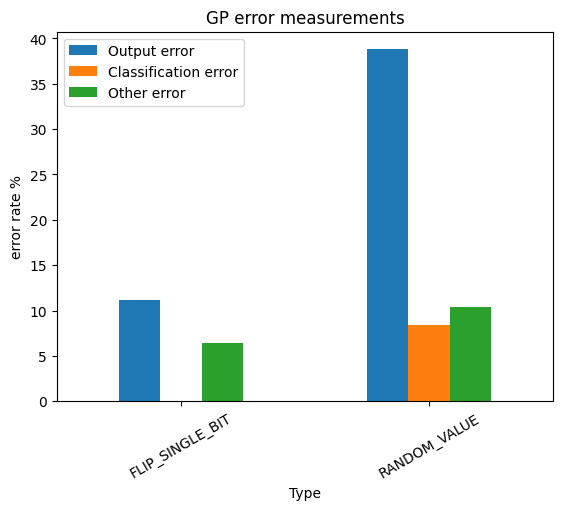

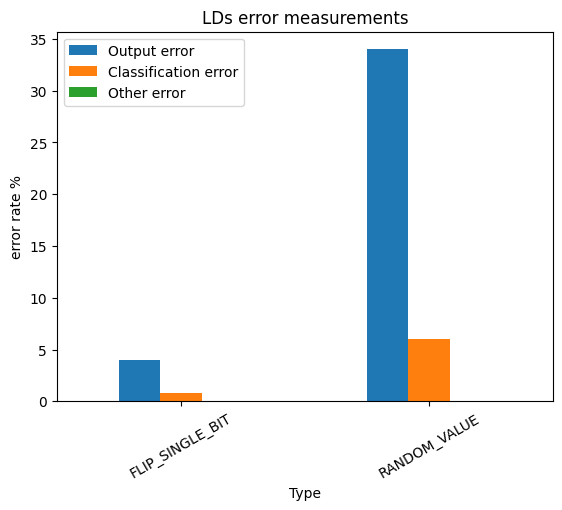

In [36]:
df_fp32 = df[df["Group"] == "fp32"]
df_gp = df[df["Group"] == "gp"]
df_ld = df[df["Group"] == "ld"]

df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_ld.index = df_ld["Type"]

df_fp32.plot(kind="bar", ylabel="error rate %", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel="error rate %", title="GP error measurements", rot=30)
df_ld.plot(kind="bar", ylabel="error rate %", title="LDs error measurements", rot=30)

In [37]:
df_kernels = pd.read_csv("./results_kernel.csv")
df_kernels.columns = ["Kernel", *df_kernels.columns[1:]]
df_kernels

,Kernel,Output error,Classification error,Masked,Other error
0,volta_sgemm_128x32_tn,283,74,668,47
1,volta_sgemm_64x32_sliced1x4_tn,222,6,403,36
2,voidattention_kernel_batched<AttentionKernel<f...,25,4,46,10
3,"voidimplicit_convolve_sgemm<float,float,1024,5...",10,0,5,0
4,voidat::native::(anonymousnamespace)::CatArray...,1,0,0,0
5,voidat::native::vectorized_elementwise_kernel<...,3,1,9,0
6,voidat::native::(anonymousnamespace)::vectoriz...,1,0,5,3


<Axes: xlabel='Kernel'>

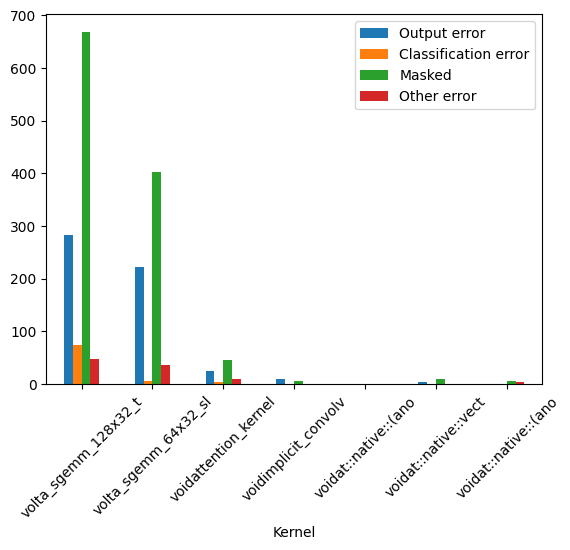

In [38]:
df_kernels.index = pd.Series([k[:20] for k in df_kernels["Kernel"]], name="Kernel")
df_kernels.plot(kind="bar", rot=45,)

In [39]:
df_cat = pd.read_csv("./results_cat.csv")
df_cat.columns = ["Group", "Type", *df_cat.columns[2:]]
df_cat

,Group,Type,SDC,Critical SDC,DUE
0,gp,FLIP_SINGLE_BIT,11.2,0.0,6.4
1,gp,RANDOM_VALUE,30.4,8.4,10.4
2,ld,FLIP_SINGLE_BIT,3.2,0.8,0.0
3,ld,RANDOM_VALUE,28.0,6.0,0.0
4,fp32,FLIP_SINGLE_BIT,9.2,1.2,0.0
5,fp32,RANDOM_VALUE,28.8,10.0,0.0
6,fp32,WARP_RANDOM_VALUE,73.2,7.6,0.0


<Axes: title={'center': 'LDs error measurements'}, xlabel='Type', ylabel='% of error'>

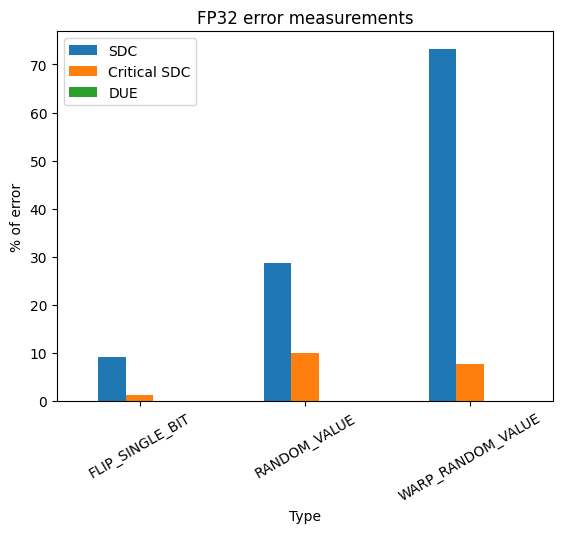

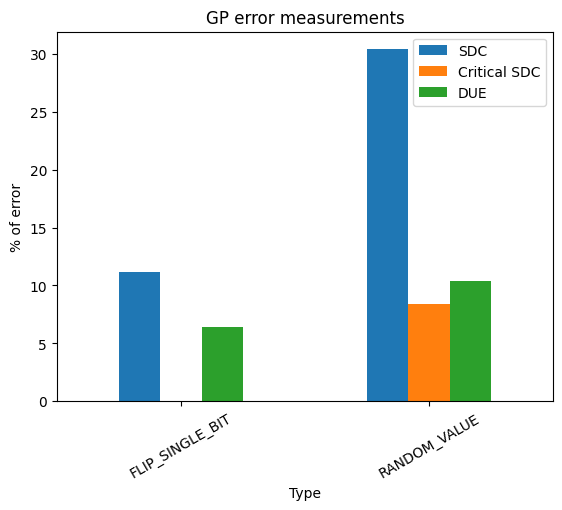

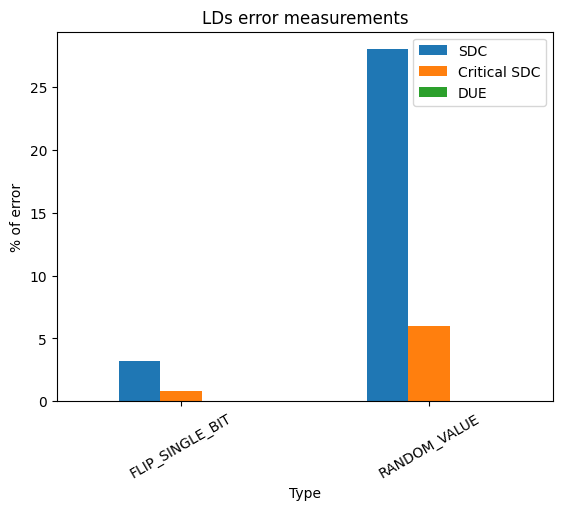

In [40]:
df_fp32 = df_cat[df_cat["Group"] == "fp32"]
df_gp = df_cat[df_cat["Group"] == "gp"]
df_ld = df_cat[df_cat["Group"] == "ld"]

df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_ld.index = df_ld["Type"]

df_fp32.plot(kind="bar", ylabel=f"% of error", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel=f"% of error", title="GP error measurements", rot=30)
df_ld.plot(kind="bar", ylabel=f"% of error", title="LDs error measurements", rot=30)